In [1]:
# linear algebra
import numpy as np
# read csv, dataframes etc
import pandas as pd

# training set and test set
train = pd.read_csv("train.csv", index_col="Id")
test = pd.read_csv("test.csv", index_col="Id")

train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [2]:
# selecting the target
y_train = train.SalePrice
y_train

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64

In [3]:
train.describe()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [4]:
# check for missing values
train.isna().sum().head(10)

MSSubClass        0
MSZoning          0
LotFrontage     259
LotArea           0
Street            0
Alley          1369
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
dtype: int64

In [5]:
# some categories have might have differences in train and test set
for col in train.select_dtypes(include=["object"]).columns:
    print(col, train[col].unique())
    print(col, test[col].unique())

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
MSZoning ['RH' 'RL' 'RM' 'FV' 'C (all)' nan]
Street ['Pave' 'Grvl']
Street ['Pave' 'Grvl']
Alley [nan 'Grvl' 'Pave']
Alley [nan 'Pave' 'Grvl']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
LandContour ['Lvl' 'HLS' 'Bnk' 'Low']
Utilities ['AllPub' 'NoSeWa']
Utilities ['AllPub' nan]
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LotConfig ['Inside' 'Corner' 'FR2' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Neighborhood ['NAmes' 'Gilbert' 'StoneBr' 'BrDale' 'NPkVill' 'NridgHt' 'Blmngtn'
 'NoRidge' 'Somerst' 'SawyerW' 'Sawyer' 'NWAmes' 'OldTown' 'BrkSide'
 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Cr

As evident, some categories have differences in the train set and the test set. So we drop those...

In [6]:
# dropping the categories having differences in train set and test set
train.drop(["Utilities", "HouseStyle", "RoofMatl", "Condition2", "GarageQual", "PoolQC",
            "Exterior1st", "Exterior2nd",
           "MiscFeature", "Heating", "Electrical"], inplace=True, axis=1)
test.drop(["Utilities", "HouseStyle", "RoofMatl", "Condition2", "GarageQual", "PoolQC",
            "Exterior1st", "Exterior2nd",
            "MiscFeature", "Heating", "Electrical"], inplace=True, axis=1)

In [7]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,Inside,Gtl,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,FR2,Gtl,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,Inside,Gtl,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,Corner,Gtl,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,FR2,Gtl,...,0,0,0,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,Inside,Gtl,...,0,0,0,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,Inside,Gtl,...,0,0,0,MnPrv,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,Inside,Gtl,...,0,0,0,GdPrv,2500,5,2010,WD,Normal,266500


# Correlation matrix

In [8]:
# correlation matrix
corr_mat = train.corr()
corr_mat["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

As we can see the top 5 features that correlate the most with `SalePrice` are
`OverallQual`, `GrLivArea`, `GarageCars`, `GarageArea`, `TotalBsmtSF`

array([[<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='OverallQual'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='GrLivArea'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='GrLivArea'>],
       [<AxesSubplot:xlabel='SalePrice', ylab

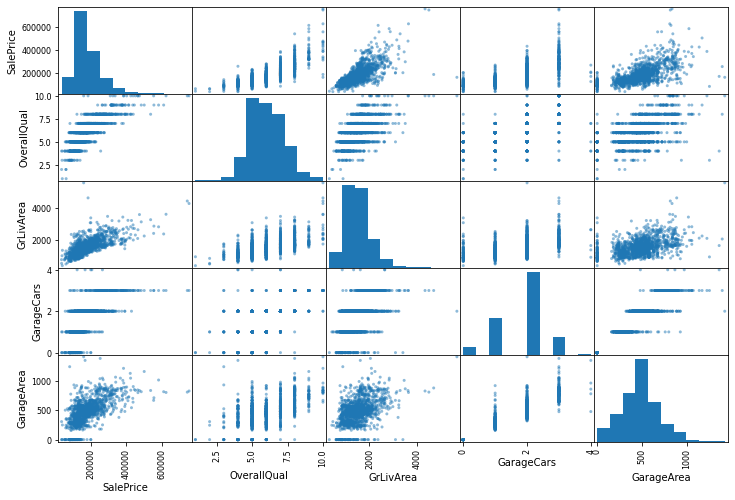

In [9]:
%matplotlib inline
from pandas.plotting import scatter_matrix

attributes = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "GarageArea"]

scatter_matrix(train[attributes], figsize=(12, 8))

In [10]:
# drop the SalePrice column from train
train.drop(["SalePrice"], axis=1, inplace=True)

# Train and Validation set splitting

In [11]:
# splitting the train set into train and validation set
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, y_train, train_size=0.8, test_size=0.2, random_state=42)

print(X_train.info())
print(X_val.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 255 to 1127
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    951 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   Alley          74 non-null     object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   LotConfig      1168 non-null   object 
 9   LandSlope      1168 non-null   object 
 10  Neighborhood   1168 non-null   object 
 11  Condition1     1168 non-null   object 
 12  BldgType       1168 non-null   object 
 13  OverallQual    1168 non-null   int64  
 14  OverallCond    1168 non-null   int64  
 15  YearBuilt      1168 non-null   int64  
 16  YearRemodAdd   1168 non-null   int64  
 17  RoofStyle      1168 non-null   object 
 18  MasVnr

# Numerical and Categorial Features (Data cleaning)

In [12]:
# select the num and cat features
num = X_train.select_dtypes(include=["int", "float"]).columns
cat = X_train.select_dtypes(include=["object"]).columns

print(num)
print(cat)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'RoofStyle',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'CentralAir', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCond',

Making a combined numerical and categorial column transformer...

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

num_transformer = SimpleImputer(strategy="mean")

# this will be a pipeline
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor_ct = ColumnTransformer(
    transformers=[
    ("num", num_transformer, num),
    ("cat", cat_transformer, cat)
])

# Models

In [21]:
from sklearn.ensemble import RandomForestRegressor

# preprocessing and predicting pipeline
rfrp = Pipeline(steps=[
    ("preprocessor", preprocessor_ct),
    ("regressor", RandomForestRegressor(n_estimators=300, max_depth=20, max_features="sqrt", 
                                        bootstrap=False, random_state=42))
])

# train on data
rfrp.fit(X_train, y_train)

# predict on the Validation set
y_preds = rfrp.predict(X_val)

print("Predictions: ", y_preds[0:5])
print("Actual prices", y_val.to_list()[0:5])

Predictions:  [137731.57316919 312047.04333333 113736.98679718 147801.82814286
 316620.32      ]
Actual prices [154500, 325000, 115000, 159000, 315500]


# Evaluation of RandomForestRegressor

Using the Root Mean Squared Error (RMSE) to evaluate the model...

In [22]:
from sklearn.metrics import mean_absolute_error

rfrp_mae = mean_absolute_error(y_val, y_preds)
rfrp_mae

17186.48260795929

Well, we can do better...

Trying GridSearch to search for the best hyperparams

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "regressor__bootstrap": [True, False],
    "regressor__n_estimators": [100, 300, 500],
    "regressor__max_depth": [10, 20, 30, 40, 50],
    "regressor__max_features": ["auto", "sqrt"],
}

grid_search = GridSearchCV(rfrp, param_grid=param_grid, cv=5, scoring="neg_mean_absolute_error")

# run the search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         SimpleImputer(),
                                                                         Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHa...
       'GarageFinish', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType',
       'SaleCondition'],
      dtype='object'))])),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'regressor__bootstrap': [True, False],
                         'regressor__max_depth': [10, 20, 30, 40, 50],
          

In [17]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath...
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'CentralAir', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType',
       'SaleCondition'],
      dtype='object'))])),
                ('regressor',
                 RandomForestRegressor(bootstrap=False, max_depth=20,
                                       max_features='sqrt', n_estimators=300,
                                       random_state=42))])

In [18]:
grid_search.best_params_

{'regressor__bootstrap': False,
 'regressor__max_depth': 20,
 'regressor__max_features': 'sqrt',
 'regressor__n_estimators': 300}

So here we get the best estimator and params from the grid search yet...

<i>Best params are: </i>

- 'regressor__bootstrap': False,
- 'regressor__max_depth': 20,
- 'regressor__max_features': 'sqrt',
- 'regressor__n_estimators': 300

In [19]:
grid_search.best_score_    # -17139.017018755803

-17139.017018755803

In [20]:
# list all scores
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-mean_score, params)

18378.14442286269 {'regressor__bootstrap': True, 'regressor__max_depth': 10, 'regressor__max_features': 'auto', 'regressor__n_estimators': 100}
18278.56427025112 {'regressor__bootstrap': True, 'regressor__max_depth': 10, 'regressor__max_features': 'auto', 'regressor__n_estimators': 300}
18255.405972189525 {'regressor__bootstrap': True, 'regressor__max_depth': 10, 'regressor__max_features': 'auto', 'regressor__n_estimators': 500}
18366.176910887967 {'regressor__bootstrap': True, 'regressor__max_depth': 10, 'regressor__max_features': 'sqrt', 'regressor__n_estimators': 100}
18325.236049128842 {'regressor__bootstrap': True, 'regressor__max_depth': 10, 'regressor__max_features': 'sqrt', 'regressor__n_estimators': 300}
18217.32812950845 {'regressor__bootstrap': True, 'regressor__max_depth': 10, 'regressor__max_features': 'sqrt', 'regressor__n_estimators': 500}
18238.925696956132 {'regressor__bootstrap': True, 'regressor__max_depth': 20, 'regressor__max_features': 'auto', 'regressor__n_estima

# Cross validation

In [26]:
from sklearn.model_selection import cross_val_score

scores = -1 * cross_val_score(rfrp, X_train, y_train, cv=3, scoring="neg_mean_absolute_error")

print("mean MAE cross val: ", scores.mean())

mean MAE cross val:  17052.7549713209


# Test the model

In [28]:
final_model = grid_search.best_estimator_

# train
final_model.fit(X_train, y_train)

# predict
preds_test = final_model.predict(test)

output = pd.DataFrame({'Id': test.index,
                       'SalePrice': preds_test})

output.to_csv("submission.csv", index=False)